In [1]:
import pandas as pd

In [29]:
from dateparser import parse

In [ ]:
%time tweets = pd.read_csv('/Users/stefan/Desktop/DS4SS WIP/data/Final_processed.csv', lineterminator='\n')

In [4]:
tweets.columns

Index(['tweet_id', 'tweet_truncated', 'date', 'tweet_source', 'tweet_coord',
       'tweet_place', 'text', 'text_noMentions', 'is_quote_status',
       'is_reply_to_status', 'is_reply_to_user', 'numMentions', 'image_urls',
       'retweet_count', 'favorite_count', 'user_id', 'user_verified',
       'user_description_text', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_favourites_count', 'user_statuses_count',
       'user_location', 'user_created_year', 'user_created_month',
       'user_geo_enabled', 'user_img_url', 'user_banner_url', 'category'],
      dtype='object')

In [10]:
temp = pd.read_csv('/Users/stefan/Downloads/historical-hourly-weather-data/temperature.csv')

In [20]:
%time mask = tweets.city.map(lambda s: s.title() if not pd.isna(s) else '').isin(temp.columns.tolist())

CPU times: user 2.45 s, sys: 16.2 ms, total: 2.46 s
Wall time: 2.47 s


In [23]:
mask.sum()

454726

In [30]:
tweets = tweets[mask]

In [50]:
%time temp.datetime = temp.datetime.map(lambda d: parse(d).strftime('%Y-%b-%d'))

CPU times: user 1min 4s, sys: 66.1 ms, total: 1min 4s
Wall time: 1min 4s


In [48]:
from dateutil.parser import parse as parse_date

In [55]:
%%time
tweet_temps = []
for _, tweet in tweets.iterrows():
    day = parse_date(tweet.date).strftime('%Y-%b-%d')
    city = tweet.city.title()
    tweet_temp = temp[temp.datetime == day][city].mean()
    tweet_temps.append(tweet_temp)

CPU times: user 26min 44s, sys: 3.98 s, total: 26min 48s
Wall time: 26min 48s


In [59]:
have_temp_mask = ~pd.isna(tweet_temps)

In [63]:
import numpy as np

In [65]:
valid_tweet_temps = np.array(tweet_temps)[have_temp_mask]

In [102]:
tweets['engagement_score'] = np.log((tweets.engagment / tweets.n_user_followers) * 100 + 1)

In [103]:
scores = tweets[have_temp_mask].engagement_score

In [90]:
tweets.loc[have_temp_mask, 'temperature'] = valid_tweet_temps.round(0)

In [101]:
from scipy.signal import savgol_filter

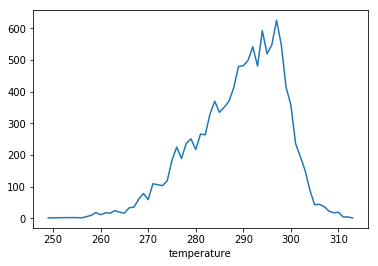

/Users/stefan/.virtualenvs/swear3.6/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


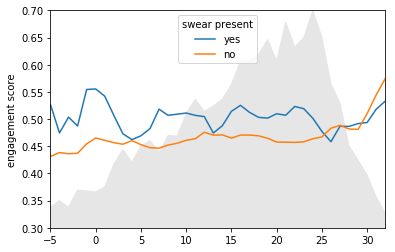

In [131]:
data = tweets[tweets.swear_present.map(bool)].groupby('temperature').engagement_score.mean()
x = data.index
y = data.values
plt.plot(x-273, savgol_filter(y, window_length=3, polyorder=1), label='yes')

data = tweets[~tweets.swear_present.map(bool)].groupby('temperature').engagement_score.mean()
x = data.index
y = data.values
plt.plot(x-273, savgol_filter(y, window_length=3, polyorder=1), label='no')


data = tweets[tweets.swear_present.map(bool)].groupby('temperature').engagement_score.count()
x = data.index
y = data.values.astype(float)
y /= max(y)
y = y *.4 + .3 

plt.fill_between(x-273, 0, y, color=(.9,)*3)

plt.legend(title='swear present', loc='upper center')
plt.ylabel('engagement score')

plt.ylim(.3, .7)
plt.xlim(-5, 32)
plt.show()

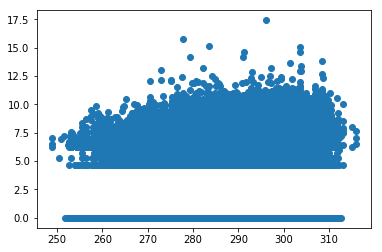

In [85]:
plt.scatter(valid_tweet_temps, scores)

In [80]:
severity = tweets[have_temp_mask].

In [73]:
from scipy.stats import pearsonr

In [81]:
pearsonr(severity, valid_tweet_temps)

(-0.00022671312883604524, 0.9257664293726044)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotliob inline

UsageError: Line magic function `%matplotliob` not found.


In [14]:
tweets[~pd.isna(tweets.city)].city.map(lambda s: s.title()).value_counts()

New York        51040
Los Angeles     48077
Chicago         44281
Houston         37338
Atlanta         29899
London          23967
Dallas          22787
Florida         22284
Toronto         21425
Washington      20053
England         17399
Philadelphia    16895
Brooklyn        16378
Boston          15586
Carolina        15404
San Diego       14769
Austin          14062
Detroit         13906
Earth           13761
Las Vegas       12847
Bay             12796
New Orleans     12784
San Antonio     12094
Virginia        11716
Memphis         11482
Cleveland       11363
Republic        11015
Ontario         11014
Phoenix         10865
Columbus        10778
                ...  
Orange Park        49
Fredonia           44
San Mateo          42
Wautoma            42
Rolla              42
Nuevo              41
Bieber             38
Hot Springs        38
Ward               35
Collins            35
Moscow             35
Emporium           34
Stuttgart          32
Rio Grande         30
Davison   

In [24]:
temp

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5
6,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.4,304.4,303.5
7,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.4,304.4,303.5
8,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.4,304.4,303.5
9,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.4,304.4,303.5
